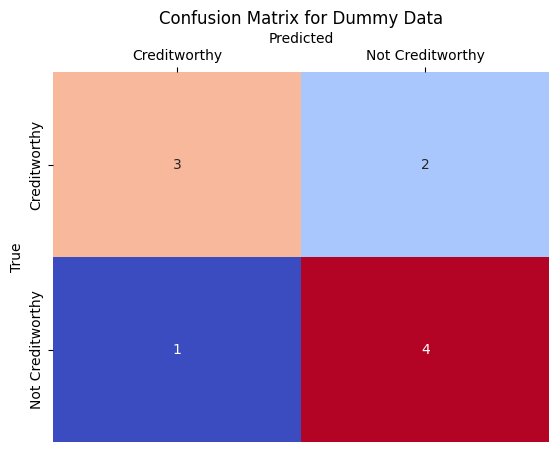

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.patches as patches


# Dummy data for the example
y_test_dummy = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
y_pred_dummy = [0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

# Generate confusion matrix
conf_matrix_dummy = confusion_matrix(y_test_dummy, y_pred_dummy)

# Reorder confusion matrix to have 'Creditworthy' as the top row and first column
conf_matrix_dummy = conf_matrix_dummy[::-1, ::-1]

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_dummy, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Creditworthy', 'Not Creditworthy'], 
            yticklabels=['Creditworthy', 'Not Creditworthy'], ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Move the x-axis label to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.title("Confusion Matrix for Dummy Data")
plt.show()


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Generate dummy data
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.choice([0, 1], size=100)
})

# Split the data into training and test sets
X = data[['feature1', 'feature2']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)



# New data row for inference
new_data = pd.DataFrame({'feature1': [0.5], 'feature2': [0.5]})
prediction = clf.predict(new_data)[0]
prediction_proba = clf.predict_proba(new_data)[0]

# Output the result
print(f"Prediction: {prediction}")
print(f"Prediction Probability: {prediction_proba}")




Prediction: 1
Prediction Probability: [0.453125 0.546875]


In [8]:
# Function to get the decision path

def get_decision_path(model, sample):
    node_indicator = model.decision_path(sample)
    leave_id = model.apply(sample)
    node_path = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
    return node_path

In [10]:
# Get the decision path
decision_path = get_decision_path(clf, new_data)


In [11]:
decision_path

array([0, 1, 2, 4], dtype=int32)

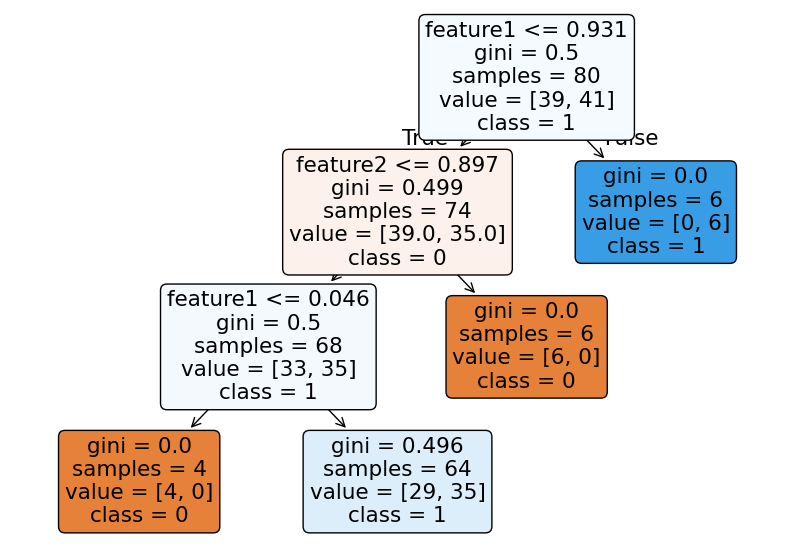

In [21]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 7))
plot_tree(clf, feature_names=['feature1', 'feature2'], class_names=['0', '1'], filled=True, rounded=True, ax=ax)

# Highlight the decision path
for node_id in decision_path:
    for text in ax.texts:
        if text.get_text().startswith(f'{node_id}'):
            x, y = text.get_position()
            ax.annotate('',
                        xy=(x, y), xycoords='data',
                        xytext=(x, y), textcoords='data',
                        arrowprops=dict(arrowstyle="circle", color='red', lw=3, alpha=0.5))

plt.show()


In [9]:

import numpy as np
import pandas as pd

np.random.seed(42)

# Number of samples
n_samples = 100

# Generate features
age = np.random.randint(20, 60, size=n_samples)
income = np.random.randint(30000, 120000, size=n_samples)
months_employed = np.random.randint(0, 240, size=n_samples)
education_level = np.random.choice(['Junior Certificate', 'Leaving Certificate', 'NFQ7', 'NFQ8', 'NFQ9'], size=n_samples)
avg_credit_card_bal = np.random.randint(0, 15000, size=n_samples)
months_with_bank = np.random.randint(0, 240, size=n_samples)

# Generate target variable with weak correlations
creditworthy = (
    (income > 50000).astype(int) +
    (months_employed > 24).astype(int) +
    (avg_credit_card_bal < 5000).astype(int) +
    (education_level == 'Leaving Certificate').astype(int) +
    (education_level == 'NFQ7').astype(int)
)

# Add some noise
creditworthy = (creditworthy + np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05])) > 2
creditworthy = creditworthy.astype(int)

# Balance the dataset
n_positive = np.sum(creditworthy)
n_negative = n_samples - n_positive

if n_positive > n_negative:
    idx_positive = np.where(creditworthy == 1)[0]
    idx_to_remove = np.random.choice(idx_positive, size=n_positive - n_negative, replace=False)
else:
    idx_negative = np.where(creditworthy == 0)[0]
    idx_to_remove = np.random.choice(idx_negative, size=n_negative - n_positive, replace=False)

mask = np.ones(n_samples, dtype=bool)
mask[idx_to_remove] = False

data = pd.DataFrame({
    'age': age[mask],
    'income': income[mask],
    'months_employed': months_employed[mask],
    'education_level': education_level[mask],
    'avg_credit_card_bal': avg_credit_card_bal[mask],
    'months_with_bank': months_with_bank[mask],
    'creditworthy': creditworthy[mask]
})



# Save the dataset to a CSV file
data.to_csv("data/credit_scoring.csv", index=False)



In [14]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
age = np.random.randint(20, 60, size=n_samples)
income = np.random.randint(30000, 120000, size=n_samples)
months_employed = np.random.randint(0, 240, size=n_samples)
education_level = np.random.choice(['Junior Certificate', 'Leaving Certificate', 'NFQ7', 'NFQ8', 'NFQ9'], size=n_samples)
avg_credit_card_bal = np.random.randint(0, 15000, size=n_samples)
months_with_bank = np.random.randint(0, 240, size=n_samples)

# Generate target variable with more complex relationships
creditworthy = (
    (income > 70000).astype(int) +
    ((income > 50000) & (months_employed > 50)).astype(int) +
    ((avg_credit_card_bal < 3000) | (avg_credit_card_bal < 1000)).astype(int) +
    (education_level == 'Leaving Certificate').astype(int) +
    (education_level == 'NFQ7').astype(int) +
    ((age > 30) & (months_with_bank > 50)).astype(int) +
    ((age >= 30) & (months_with_bank < 50)).astype(int)
)

# Add some noise (reduced noise)
creditworthy = (creditworthy + np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05])) > 2
creditworthy = creditworthy.astype(int)

# Balance the dataset
n_positive = np.sum(creditworthy)
n_negative = n_samples - n_positive

if n_positive > n_negative:
    idx_positive = np.where(creditworthy == 1)[0]
    idx_to_remove = np.random.choice(idx_positive, size=n_positive - n_negative, replace=False)
else:
    idx_negative = np.where(creditworthy == 0)[0]
    idx_to_remove = np.random.choice(idx_negative, size=n_negative - n_positive, replace=False)

mask = np.ones(n_samples, dtype=bool)
mask[idx_to_remove] = False

data = pd.DataFrame({
    'age': age[mask],
    'income': income[mask],
    'months_employed': months_employed[mask],
    'education_level': education_level[mask],
    'avg_credit_card_bal': avg_credit_card_bal[mask],
    'months_with_bank': months_with_bank[mask],
    'creditworthy': creditworthy[mask]
})

# Dummify the categorical variable
# data = pd.get_dummies(data, columns=['education_level'], drop_first=True)

# Save the dataset to a CSV file
data.to_csv("data/credit_scoring.csv", index=False)


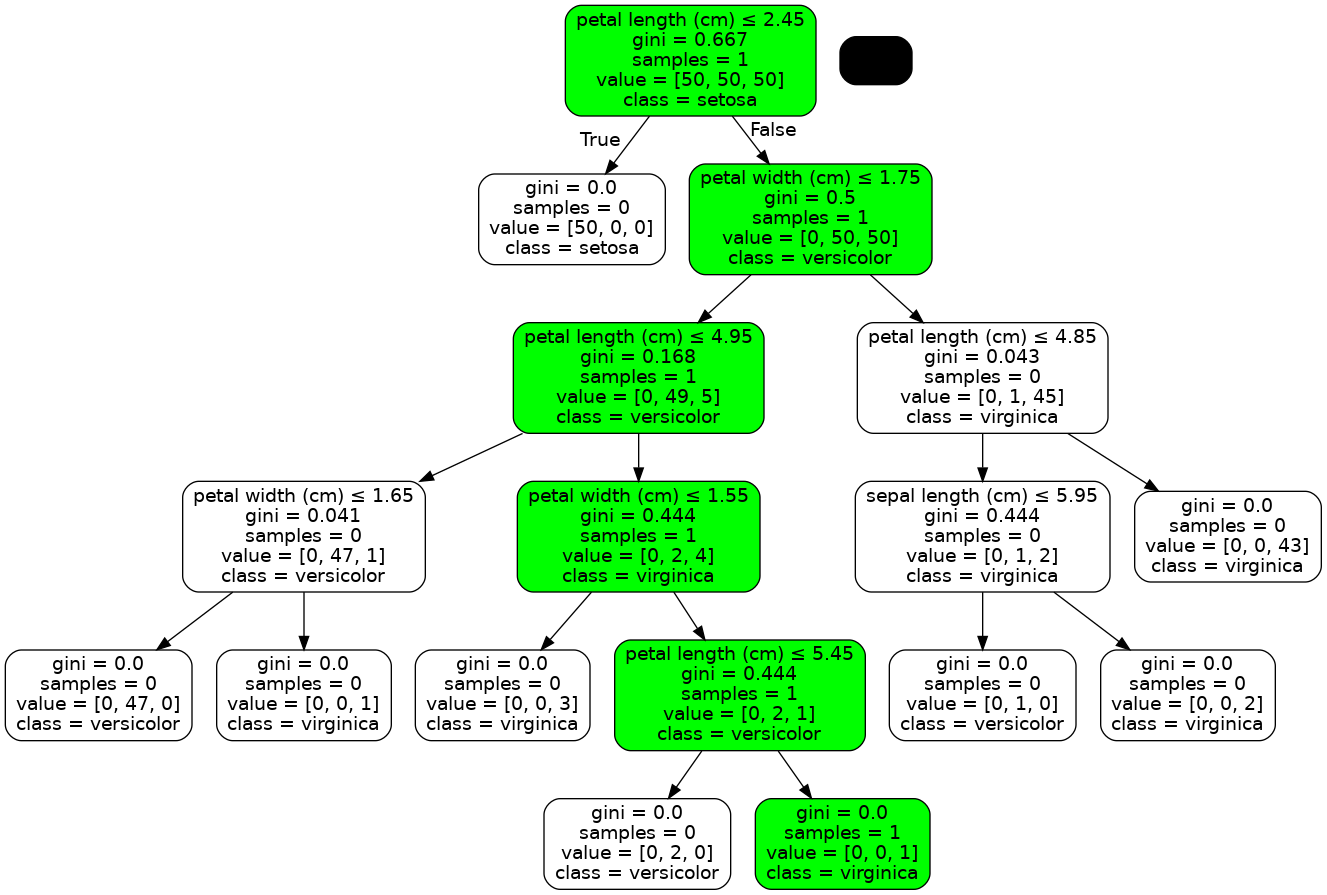

In [26]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image, display

clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# empty all nodes, i.e.set color to white and number of samples to zero
for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

samples = iris.data[129:130]
decision_paths = clf.decision_path(samples)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

# Display the graph in the notebook
image_data = graph.create_png()
display(Image(image_data))


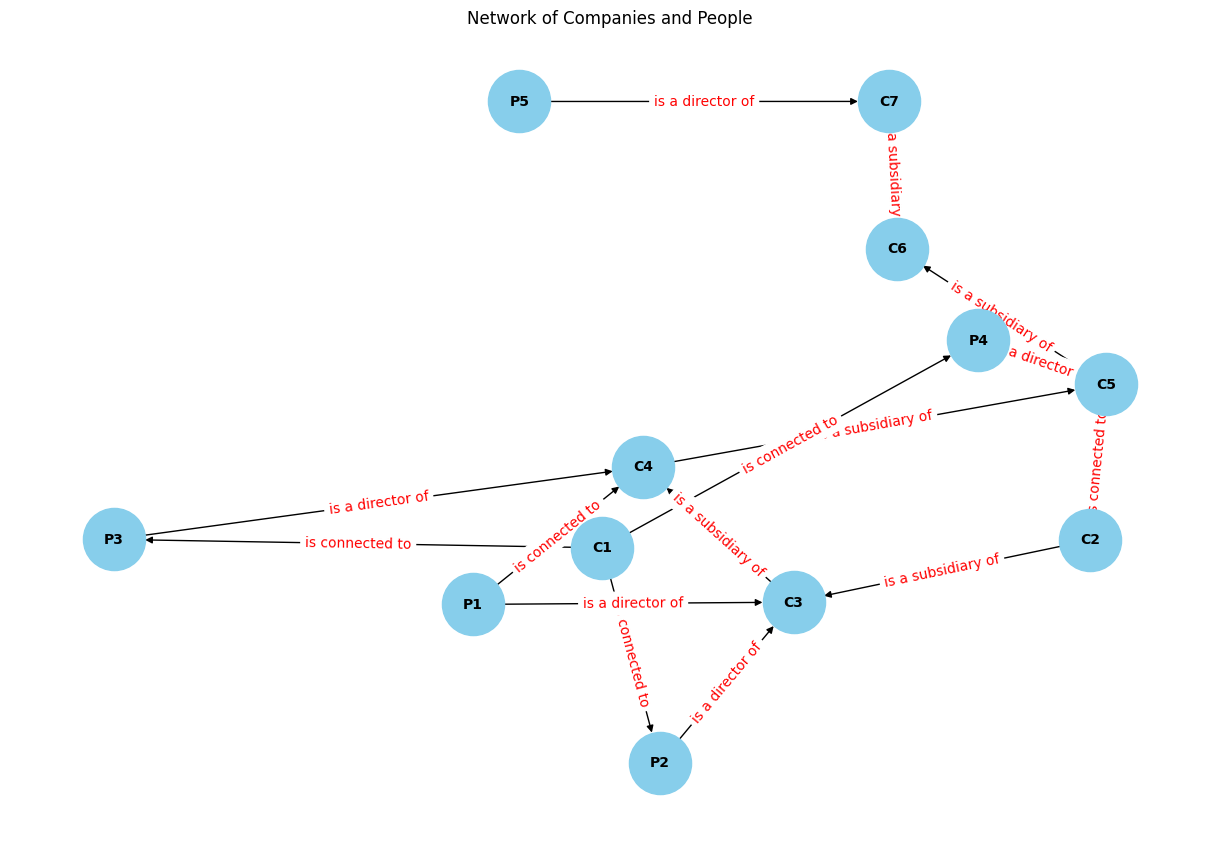

Node P1 has a suspicion level of 1.00
Node P2 has a suspicion level of 0.00
Node P3 has a suspicion level of 0.00
Node P4 has a suspicion level of 0.00
Node P5 has a suspicion level of 0.00
Node C1 has a suspicion level of 0.00
Node C2 has a suspicion level of 1.00
Node C3 has a suspicion level of 0.00
Node C4 has a suspicion level of 0.00
Node C5 has a suspicion level of 0.00
Node C6 has a suspicion level of 0.00
Node C7 has a suspicion level of 0.00


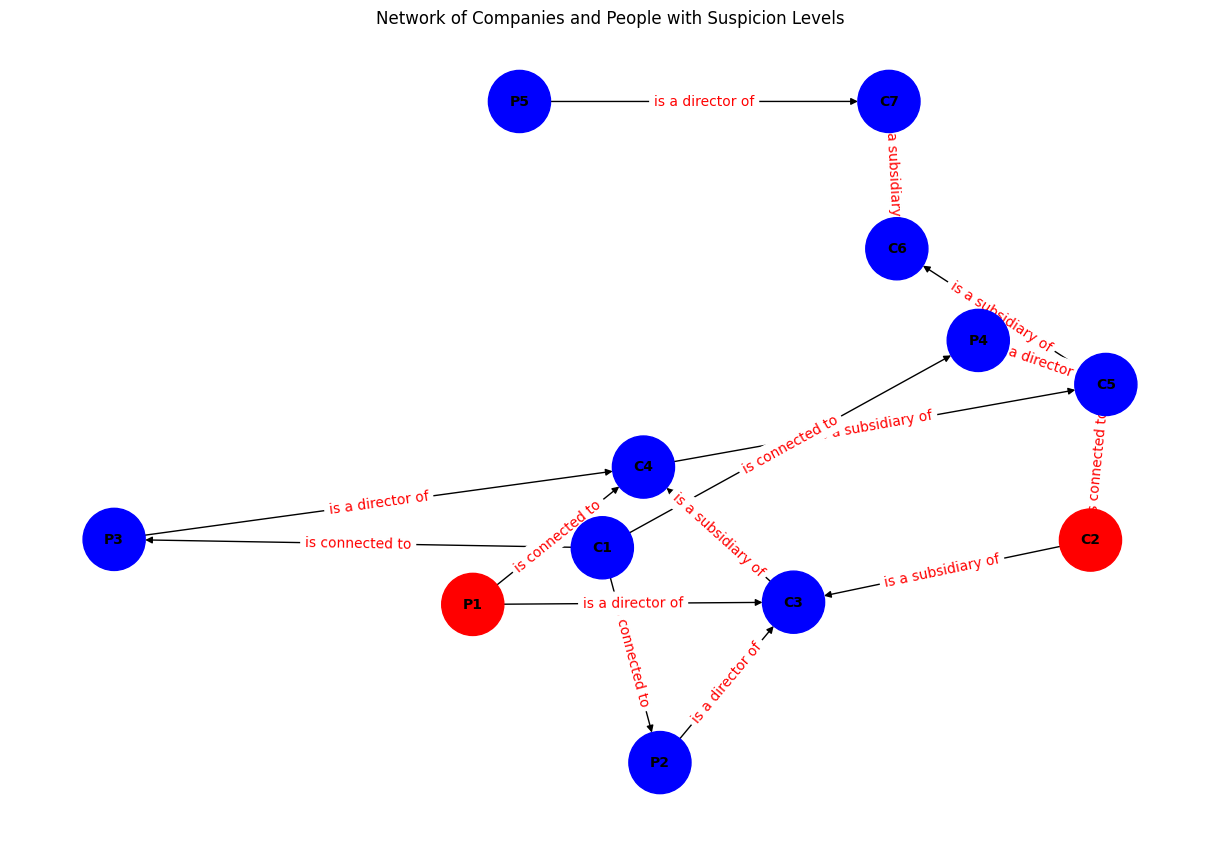

In [22]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes for people (P) and companies (C)
people = ['P1', 'P2', 'P3', 'P4', 'P5']
companies = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

# Add criminal entities
criminals = ['P1', 'C2']

# Add edges to represent relationships
relationships = [
    ('P2', 'C3', 'is a director of'),
    ('P3', 'C4', 'is a director of'),
    ('P4', 'C5', 'is a director of'),
    ('C3', 'C4', 'is a subsidiary of'),
    ('C4', 'C5', 'is a subsidiary of'),
    ('C5', 'C6', 'is a subsidiary of'),
    ('C6', 'C7', 'is a subsidiary of'),
    ('P5', 'C7', 'is a director of'),
    ('C1', 'P2', 'is connected to'),
    ('C1', 'P3', 'is connected to'),
    ('C1', 'P4', 'is connected to'),
    ('P1', 'C3', 'is a director of'),  # P1 (criminal) is indirectly connected to C1 through P2 and C3
    ('C2', 'C3', 'is a subsidiary of'), # C2 (criminal) is indirectly connected to C1 through P2 and C3
    ('P1', 'C4', 'is connected to'),    # Additional connections to ensure multiple short paths
    ('C2', 'C5', 'is connected to')
]

# Add nodes and edges to the graph
G.add_nodes_from(people, type='person')
G.add_nodes_from(companies, type='company')
G.add_edges_from([(u, v) for u, v, r in relationships])

# Assign node attributes
for node in G.nodes:
    G.nodes[node]['criminal'] = node in criminals

# Assign edge labels
edge_labels = {(u, v): r for u, v, r in relationships}

# Visualize the network with longer edges
pos = nx.spring_layout(G, k=0.3)  # Adjust 'k' for longer edges
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Network of Companies and People")
plt.show()

# Function to determine the level of suspicion based on weighted proximity to criminals
def evaluate_suspicion(G, criminals):
    suspicion = {}
    for node in G.nodes:
        total_weight = 0
        for criminal in criminals:
            try:
                path_length = nx.shortest_path_length(G, source=node, target=criminal)
                total_weight += 1 / (path_length + 1)
            except nx.NetworkXNoPath:
                continue
        suspicion[node] = total_weight
    return suspicion

# Evaluate suspicion
suspicion = evaluate_suspicion(G, criminals)

# Print suspicion levels
for node, level in suspicion.items():
    print(f"Node {node} has a suspicion level of {level:.2f}")

# Function to get node colors based on suspicion levels
def get_node_colors(suspicion):
    max_suspicion = max(suspicion.values())
    colors = []
    for node in suspicion:
        color = (suspicion[node] / max_suspicion, 0, 0) if suspicion[node] > 0 else (0, 0, 1)
        colors.append(color)
    return colors

# Get node colors based on suspicion levels
node_colors = get_node_colors(suspicion)

# Visualize the network with suspicion levels
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, edge_color='k', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Network of Companies and People with Suspicion Levels")
plt.show()
